In [1]:
import itchat


itchat.login()
#爬取微信好友信息，返回一个json文件
friends = itchat.get_friends(update=True)[0:]  

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 小七七


# 性别统计

In [3]:
#初始化计数器
male = female = other = 0
#friends[0]是自己的信息，所以要从friends[1]开始
for i in friends[1:]:  
    sex = i["Sex"]  
    if sex == 1:  
        male += 1  
    elif sex == 2:  
        female += 1  
    else:  
        other += 1  
#计算好友总数 
total = len(friends[1:]) 

#打印出自己的好友性别比例
print("男性好友： %.2f%%" % (float(male)/total*100) + "\n" +  
      "女性好友： %.2f%%" % (float(female)/total*100) + "\n" +  
      "不明性别好友： %.2f%%" % (float(other)/total*100))

男性好友： 38.05%
女性好友： 54.34%
不明性别好友： 7.61%


# 微信好友的城市分布

再仔细观察 friends 列表，发现里面还包含了好友昵称、省份、城市、个人简介等等的数据，刚好可以用来分析好友城市分布，最好的方式是定义一个函数把数据都爬下来，存到数据框里，再进行分析。

In [4]:
#定义一个函数，用来爬取各个变量
def get_var(var):  
    variable = []  
    for i in friends:  
        value = i[var]  
        variable.append(value)  
    return variable  

#调用函数得到各变量，并把数据存到csv文件中，保存到桌面
NickName = get_var("NickName")  
Sex = get_var("Sex")  
Province = get_var('Province')  
City = get_var('City')  
Signature = get_var('Signature')  

In [5]:
from pandas import DataFrame 


data = {'NickName' : NickName, 'Sex' : Sex, 'Province' : Province,  
        'City' : City, 'Signature' : Signature}  
frame = DataFrame(data)  
frame.to_csv('data.csv', index=True)  

# 微信好友个性签名的自定义词云图

好玩的来了。之前已经爬下了每个好友的个性签名，刚好可以分析一下大伙儿个性签名时使用的高频词语是什么，顺便可以做个词云图。
　　先把原先爬下来的个性签名（Signature）打印出来，发现有很多本来是表情的，变成了 emoji、span、class 等等这些无关紧要的词，需要先替换掉，另外，还有类似<>/= 之类的符号，也需要写个简单的正则替换掉，再把所有拼起来，得到 text 字串。

In [6]:
import re  


siglist = []  
for i in friends:  
    signature = i["Signature"].strip().replace("span","").replace("class","").replace("emoji","")  
    rep = re.compile("lf\d+\w*|[<>/=]")  
    signature = rep.sub("", signature)  
    siglist.append(signature)  
text = "".join(siglist)

In [7]:
import jieba


wordlist = jieba.cut(text, cut_all=True)  
word_space_split = " ".join(wordlist) 

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/ly/0kbp6nyx09x0763nh3z02ll80000gn/T/jieba.cache
Loading model cost 0.827 seconds.
Prefix dict has been built succesfully.


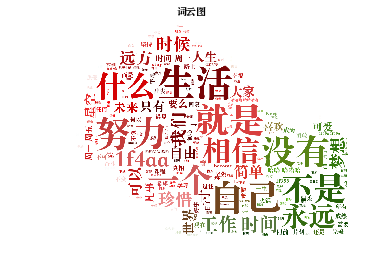

In [9]:
import matplotlib.pyplot as plt  
from wordcloud import WordCloud, ImageColorGenerator  
import numpy as np  
import PIL.Image as Image  
from matplotlib.font_manager import FontProperties

coloring = np.array(Image.open("/Users/ycy/Desktop/rose.jpg")) 
my_wordcloud = WordCloud(background_color="white", max_words=2000,  
                         mask=coloring, max_font_size=60, random_state=42,  
                         scale=2, font_path='System/Library/Fonts/Songti.ttc').generate(word_space_split)  
 
font = FontProperties(fname="/Library/Fonts/Songti.ttc")

image_colors = ImageColorGenerator(coloring)
plt.title(u"词云图", fontproperties=font)
plt.imshow(my_wordcloud.recolor(color_func=image_colors))  
#plt.imshow(my_wordcloud)  
plt.axis("off")  
plt.savefig('my_wordcloud.png')
plt.show()